In [1]:
# Note: Since the data is ordered and the axis is time and magnitude, I didn't see the need in not using a line plot.  
# If the data was unordered data then a scatter plot would make sense and a scatter plot with the magnitude of the datapoint 
# proportional to the size of the circle would be informative.


# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
tumor_df = pd.merge(clinical_df, mouse_df, on ='Mouse ID', how='inner')

# Display the data table for preview
tumor_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = tumor_df.loc[:, ['Drug', 'Timepoint','Tumor Volume (mm3)']]

#mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()
mean_df2 = mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
mean_df=mean_df2.reset_index()

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_df = tumor_df.loc[:, ['Drug', 'Timepoint','Tumor Volume (mm3)']]
sem_df = sem_tumor_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_df = sem_df.reset_index()

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat_df = mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_reformat_df = sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_reformat_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


No handles with labels found to put in legend.


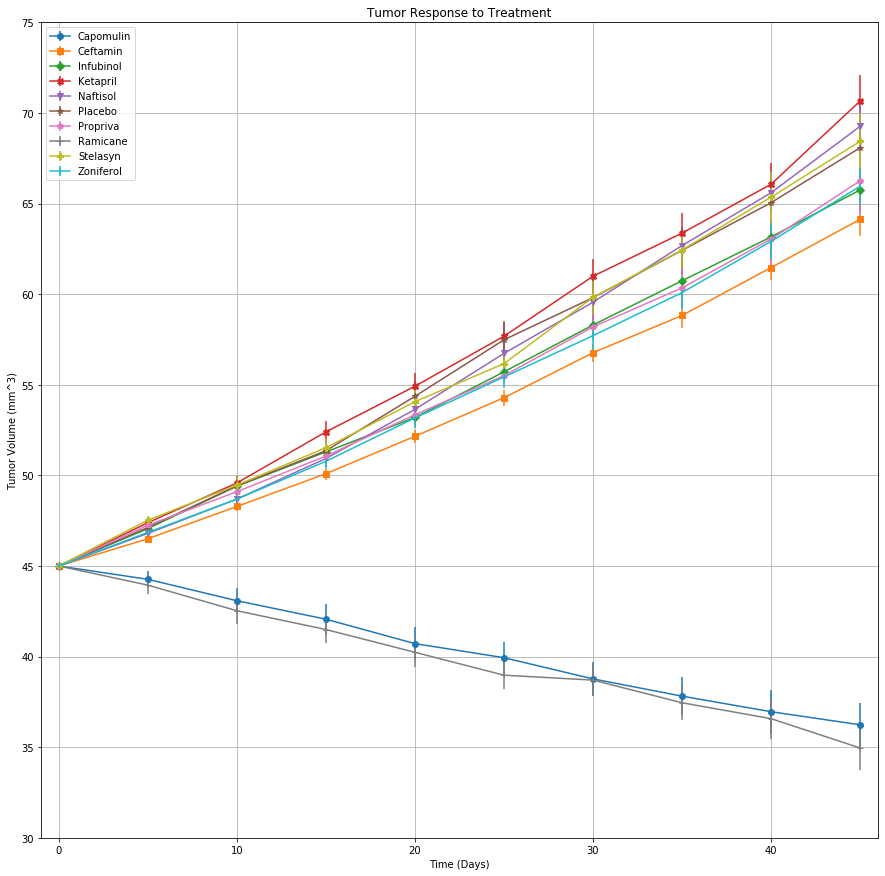

In [5]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm^3)')
plt.legend(loc='best')
plt.axis([-1, 46, 30, 75])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(mean_reformat_df.index)
drug_list = list(mean_reformat_df.keys())

for x in drug_list:
    val = mean_reformat_df[x]
    err = sem_reformat_df[x]
    plt.errorbar(time,val,yerr=err, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best')



# Save the Figure



## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_df = tumor_df.loc[:, ['Drug', 'Timepoint','Metastatic Sites']]
met_df2 = mean_met_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame
met_df = met_df2.reset_index()

# Preview DataFrame
met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_df = mean_met_df.loc[:, ['Drug', 'Timepoint','Metastatic Sites']]
sem_met_df = sem_met_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
sem_met_df = sem_met_df.reset_index()

# Preview DataFrame
sem_met_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_reformat_df = met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
sem_met_reformat_df = sem_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
sem_met_reformat_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


No handles with labels found to put in legend.


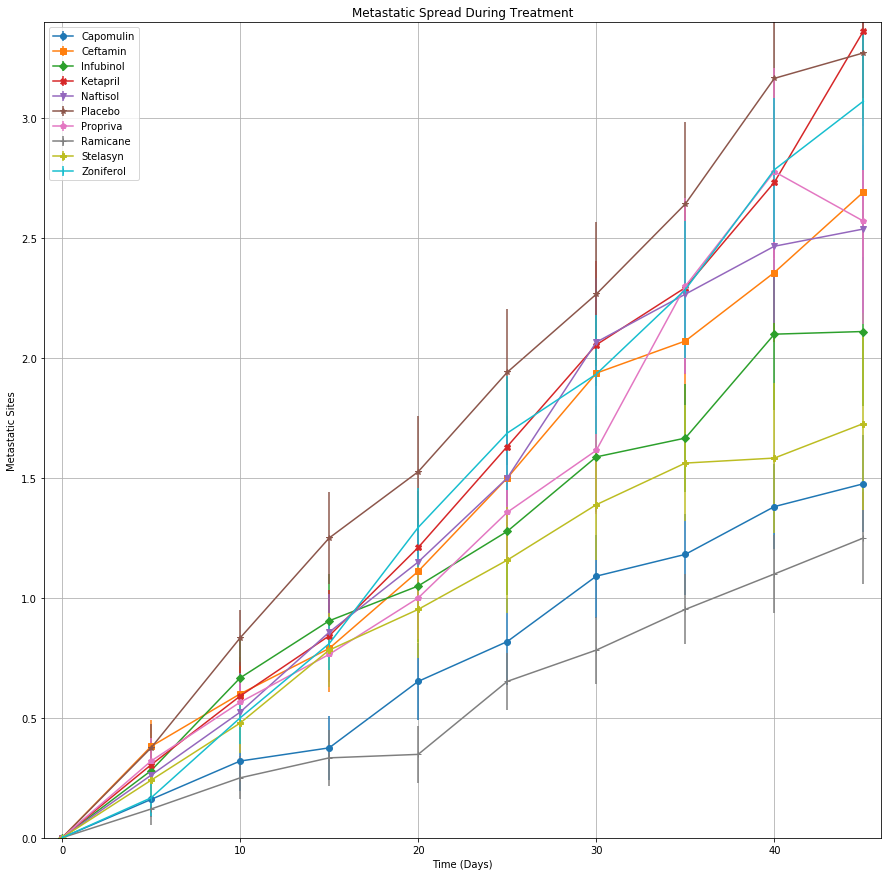

In [20]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(15,15))
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='best')
plt.axis([-1, 46, 0, 3.4])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(met_reformat_df.index)
drug_list = list(met_reformat_df.keys())

for x in drug_list:
    val = met_reformat_df[x]
    err = sem_met_reformat_df[x]
    plt.errorbar(time,val,yerr=err, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best')
# Save the Figure
plt.savefig('metastic_line_plot.jpeg')
# Show the Figure
#I'm using the subplots command so it already shows 

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = tumor_df.loc[:, ['Drug', 'Timepoint','Mouse ID']]

#mean_tumor_df.groupby(['Drug', 'Timepoint']).mean()
mice_df2 = mice_df.groupby(['Drug', 'Timepoint']).count()
# Convert to DataFrame
cnt_mice_df = mice_df2.reset_index()
# Preview DataFrame
cnt_mice_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat_df = cnt_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# sem_mice_reformat_df = sem_mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview that Reformatting worked
mice_reformat_df
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


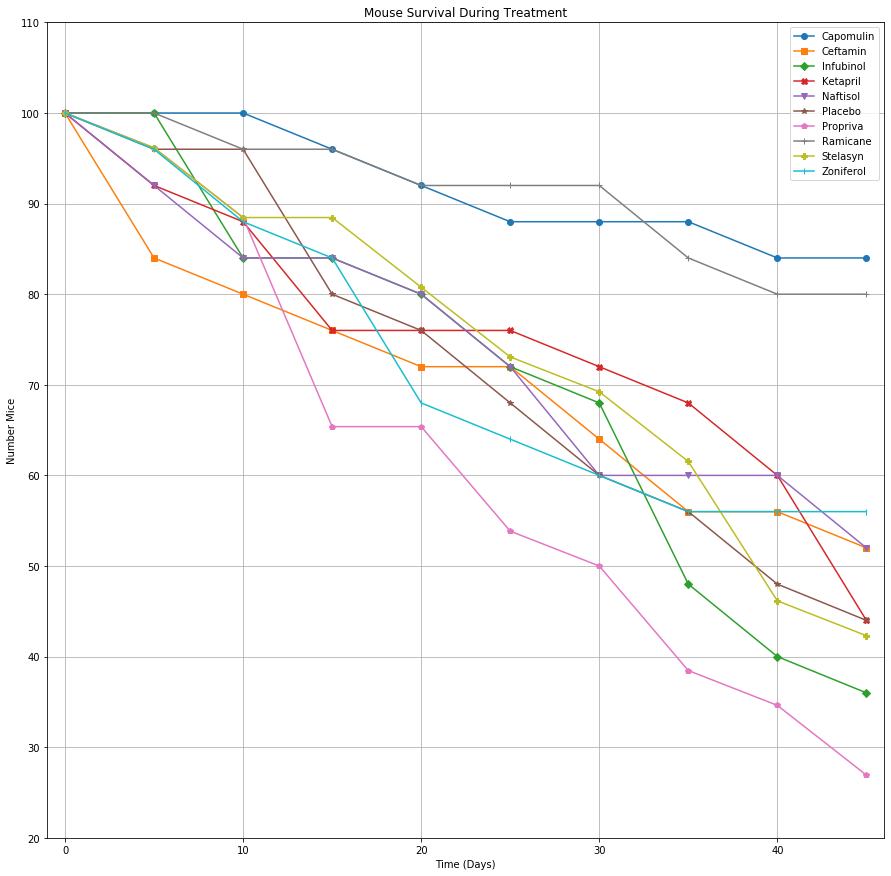

In [13]:
# Generate the Plot (Accounting for percentages)

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Mouse Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number Mice')
plt.axis([-1, 46, 20, 110])
plt.grid()
markers=['o', 's', 'D', 'X', 'v', '*', 'p', '+', 'P', '|' ]
time = list(mice_reformat_df.index)
drug_list = list(mice_reformat_df.keys())
mice_perc_df = mice_reformat_df   ##This is just to create a new dataframe to write to that is same size & indices

for x in drug_list:
    mice_perc_df[x] = (mice_reformat_df[x]/mice_reformat_df[x][0])*100

for x in drug_list:
    val = mice_perc_df[x]
    plt.plot(time,val, marker=markers[drug_list.index(x)], label=drug_list[drug_list.index(x)])

plt.legend(loc='best')

# Save the Figure
plt.savefig('mouse_survival_line_plot.jpeg')
# Show the Figure
# Already is shown due to using subplots(); no need for plt.show()


## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

percent_change_df =  mean_reformat_df.iloc[-1] - mean_reformat_df.iloc[0]
percent_change_df

Drug
Capomulin    -8.763886
Ceftamin     19.132421
Infubinol    20.755562
Ketapril     25.662958
Naftisol     24.265506
Placebo      23.084082
Propriva     21.258529
Ramicane    -10.044405
Stelasyn     23.438310
Zoniferol    20.960888
dtype: float64

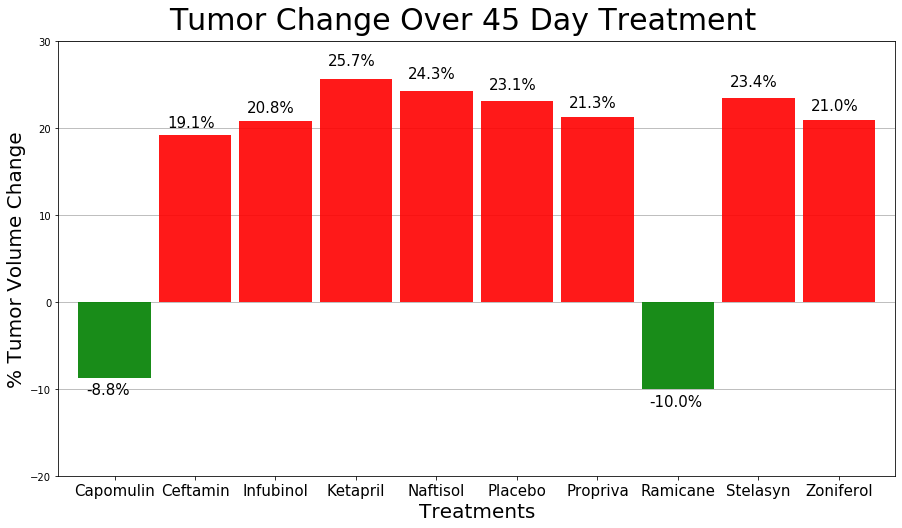

In [17]:
fig, ax = plt.subplots(1, 1)

ax = percent_change_df.plot(kind="bar", align='center', alpha=0.9, 
                                    color=['green','red','red','red','red','red','red','green','red','red'],
                                    figsize=(15,8), zorder=6, width=0.9)

plt.figtext(.5, .9, 'Tumor Change Over 45 Day Treatment', fontsize=30, ha='center')
plt.ylabel('% Tumor Volume Change', fontsize=20)
plt.ylim(-20, 30)
plt.xlabel('Treatments',fontsize=20)
plt.xticks(rotation='horizontal', fontsize=15)
ax.grid(True, axis='y', zorder=2)


##################################################################################################
#Modified from:  https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()*1.1 -1, str(round(i.get_height(),1)) +'%', fontsize=15,
                color='black')

###################################################################################################
    
#Save to file
plt.savefig('tumor_change_bar_plot.jpeg')